<a href="https://www.kaggle.com/code/evannicely/processing-images-of-arithmetic-expressions?scriptVersionId=226420258" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [12]:
import os
import re
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [13]:
folder_path = "/kaggle/input/handwritten-math-expressions-dataset/Handwritten_equations_images"

def numerical_sort(file):
    match = re.search(r'(\d+)', file)
    return int(match.group(1)) if match else float('inf')

file_paths = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.png')]
file_paths = sorted(file_paths, key = numerical_sort)

In [17]:
def process_image(image_path):
    image = cv2.imread(image_path)
    # hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # hsv[:,:,1] = np.clip(2 * hsv[:,:,1], 0, 255)
    # image = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # image = cv2.GaussianBlur(image, (5, 5), cv2.BORDER_DEFAULT)
    image = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,55,25)
    # blurred = cv2.blur(image, (5, 35))
    contours,_ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # print(len(contours))
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    numbers = 0
    # new_image = np.shape(image)
    for c in contours:
        x, y, w, h = cv2.boundingRect(c)
        if w > 3 and h > 3 and w < 200 and (h < 150 or w > 30):
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 1)
            numbers += 1
    image_key = int(re.search(r'(\d+)', image_path).group(1))
    plt.imshow(image, cmap = "gray")
    plt.title(f"Processed Image #{image_key} - found {numbers}")
    plt.show()

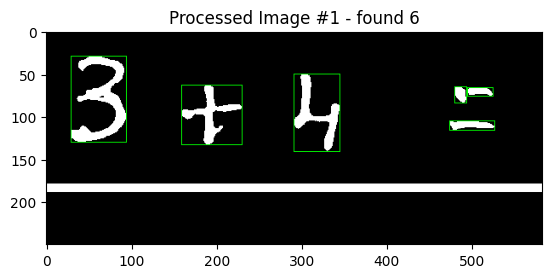

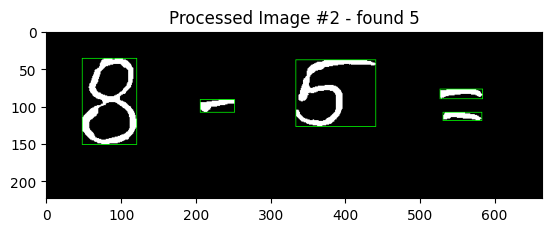

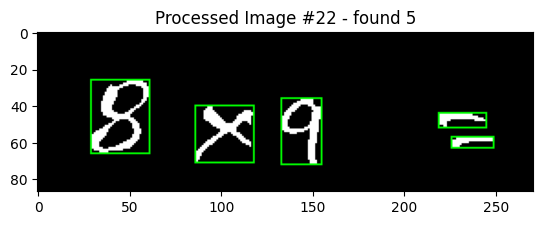

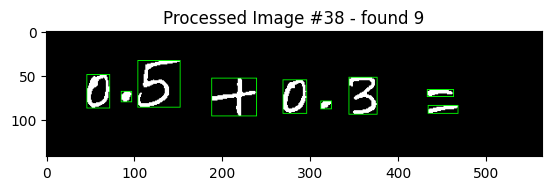

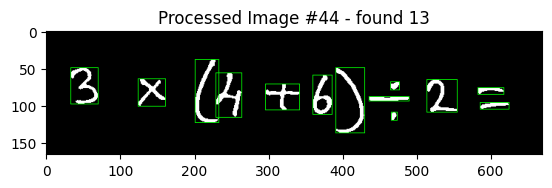

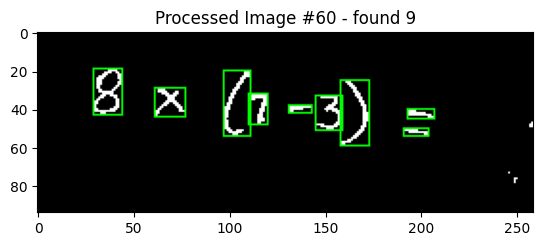

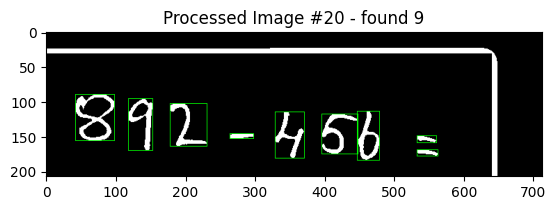

In [18]:
process_image("/kaggle/input/handwritten-math-expressions-dataset/Handwritten_equations_images/1.png")
process_image("/kaggle/input/handwritten-math-expressions-dataset/Handwritten_equations_images/2.png")
process_image("/kaggle/input/handwritten-math-expressions-dataset/Handwritten_equations_images/22.png")
process_image("/kaggle/input/handwritten-math-expressions-dataset/Handwritten_equations_images/38.png")
process_image("/kaggle/input/handwritten-math-expressions-dataset/Handwritten_equations_images/44.png")
process_image("/kaggle/input/handwritten-math-expressions-dataset/Handwritten_equations_images/60.png")
process_image("/kaggle/input/handwritten-math-expressions-dataset/Handwritten_equations_images/20.png")

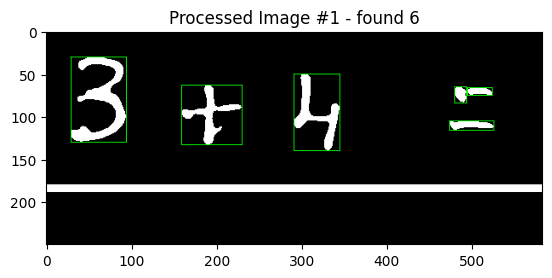

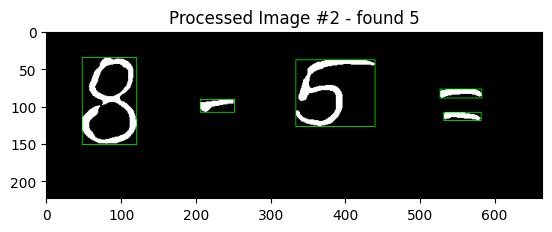

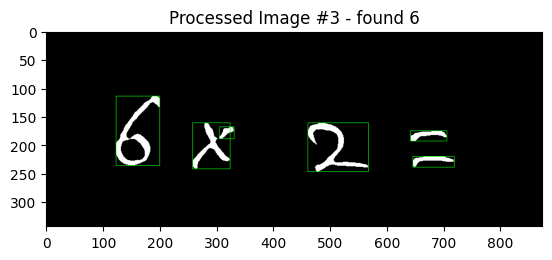

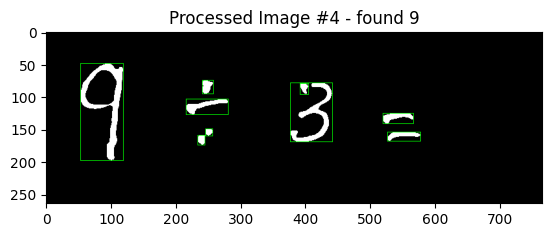

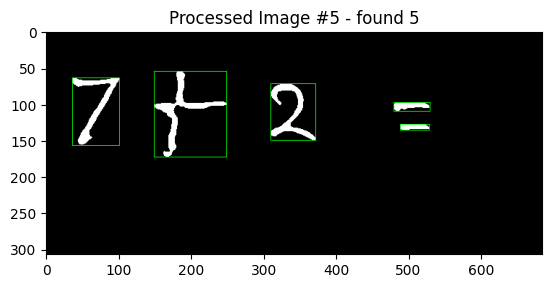

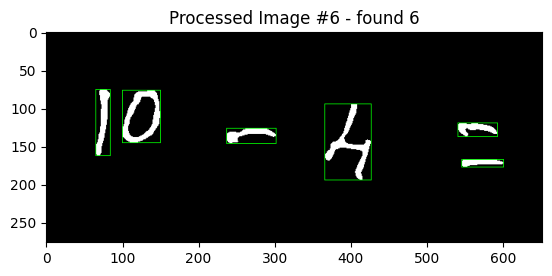

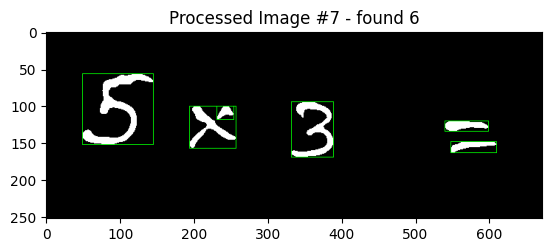

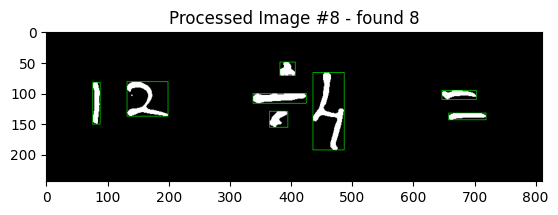

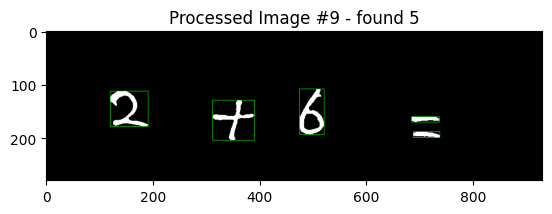

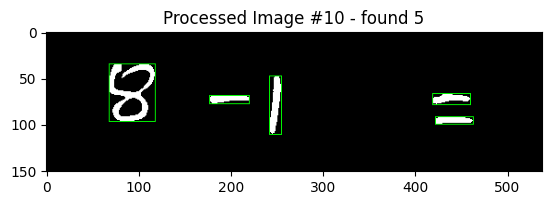

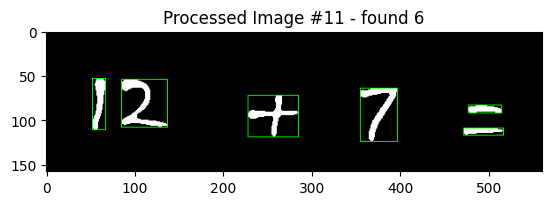

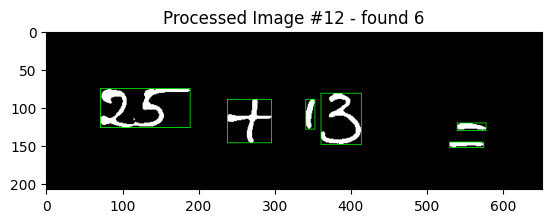

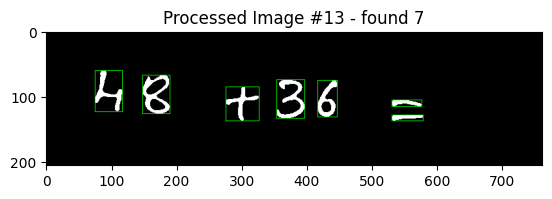

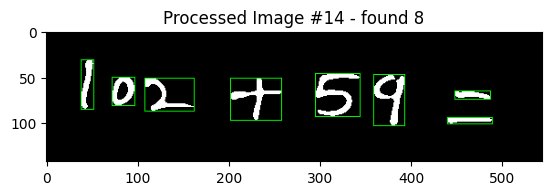

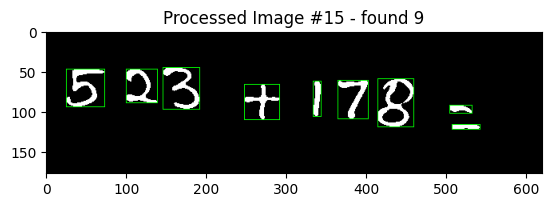

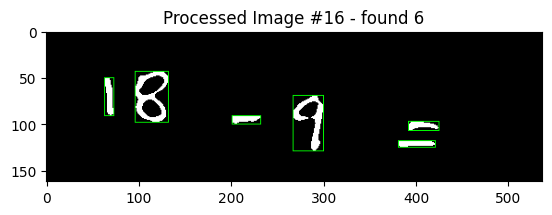

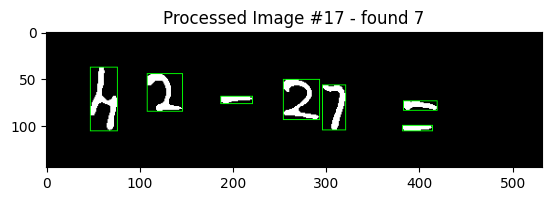

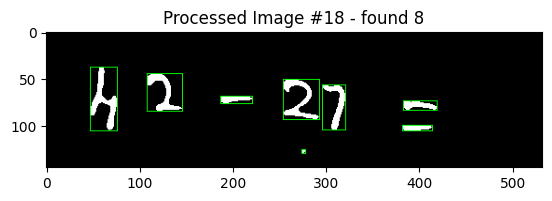

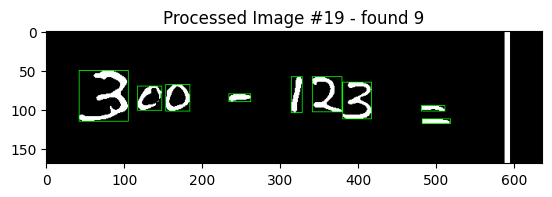

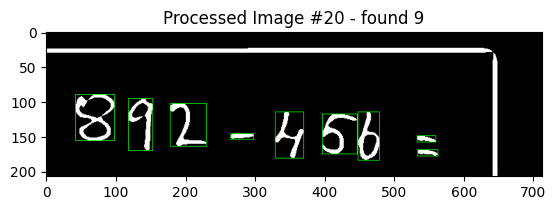

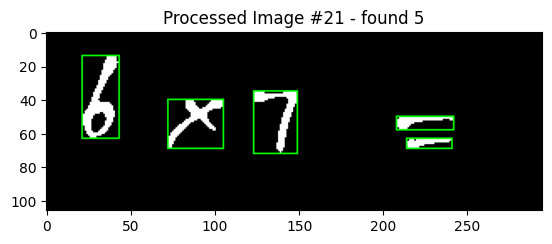

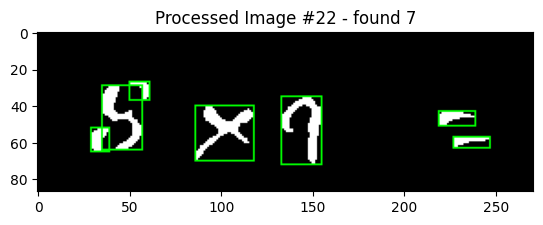

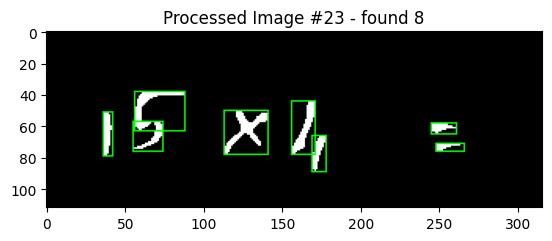

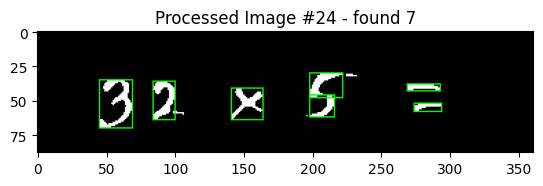

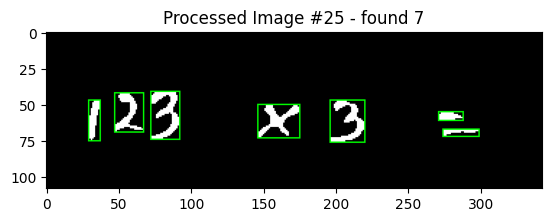

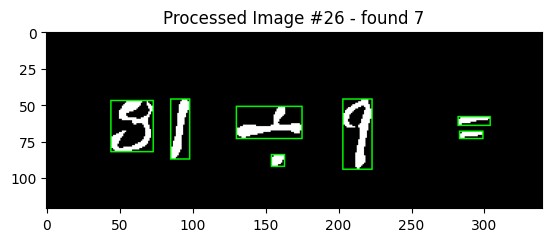

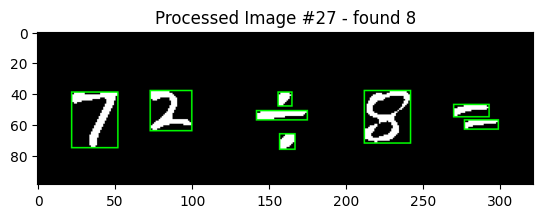

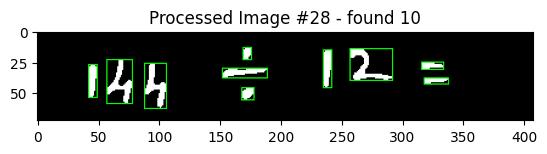

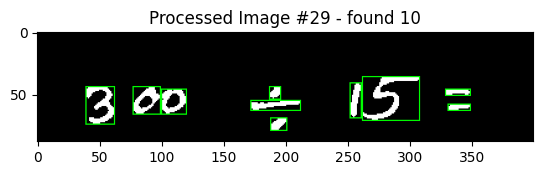

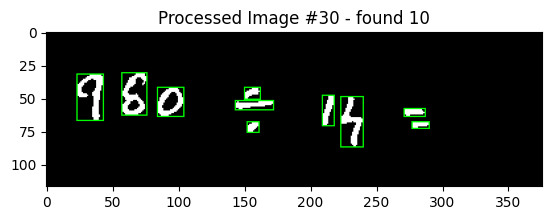

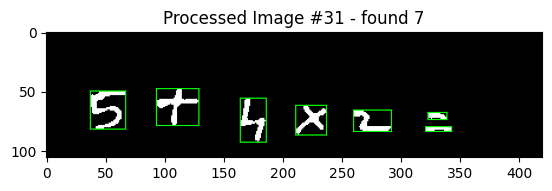

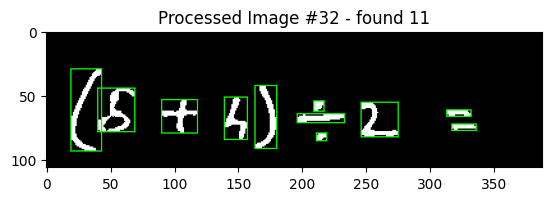

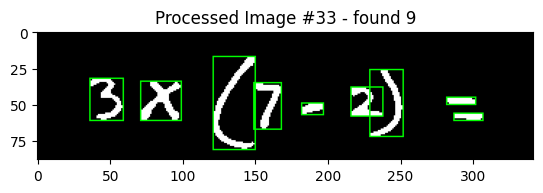

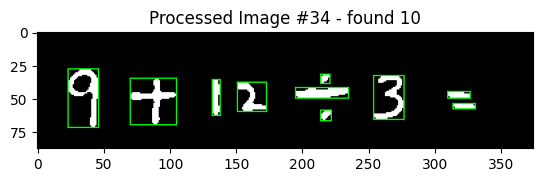

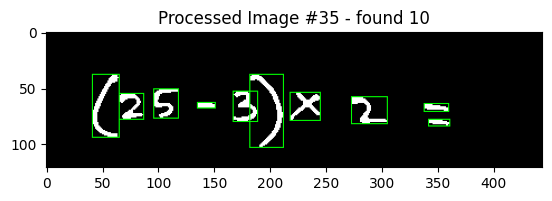

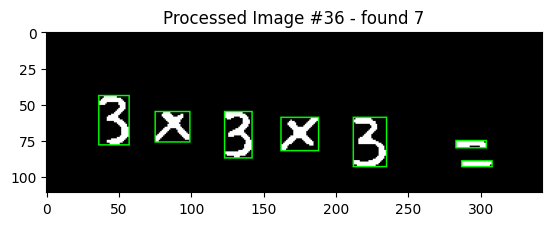

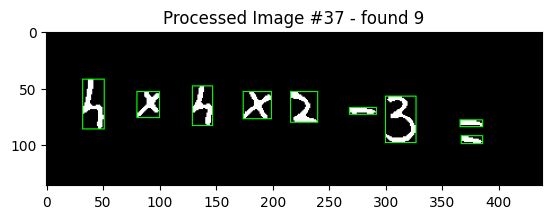

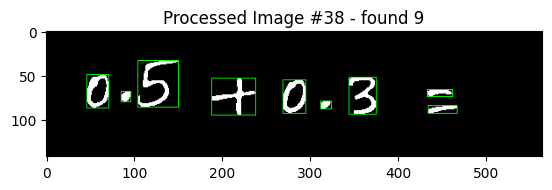

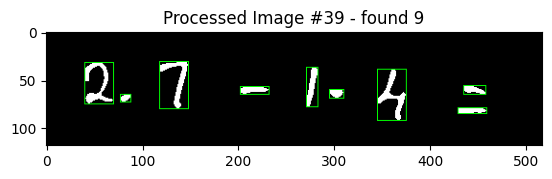

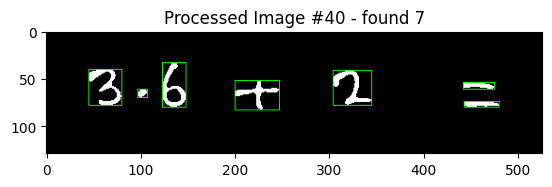

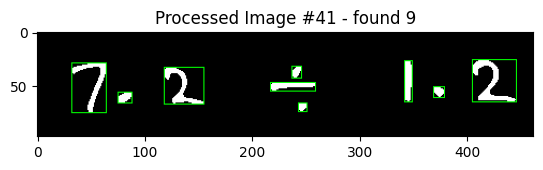

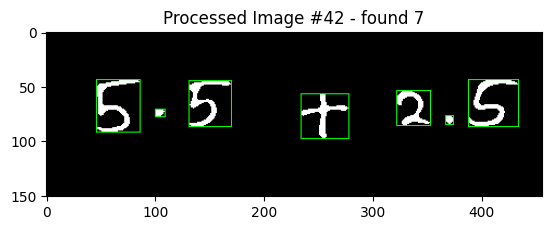

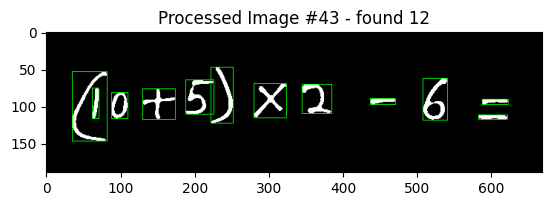

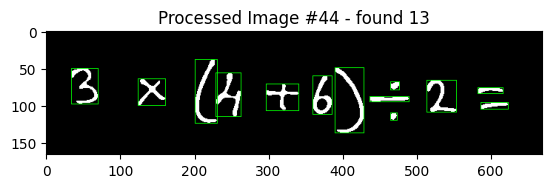

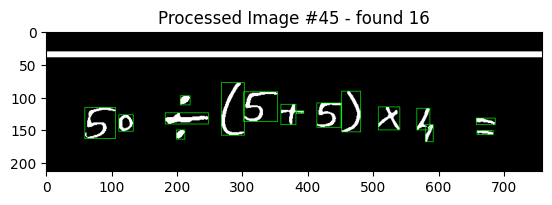

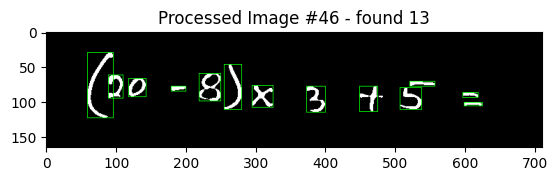

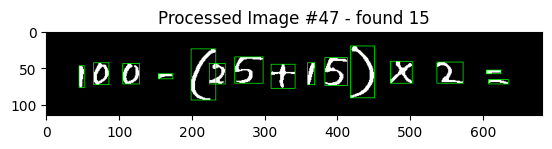

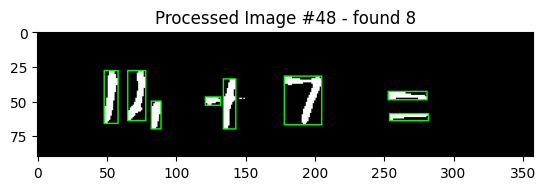

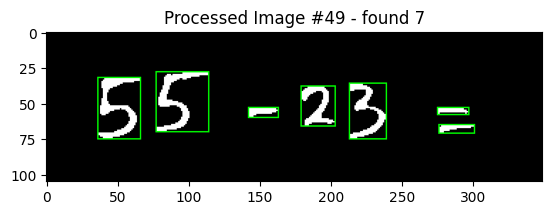

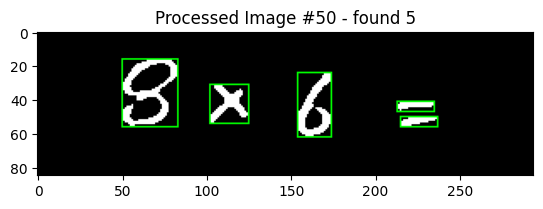

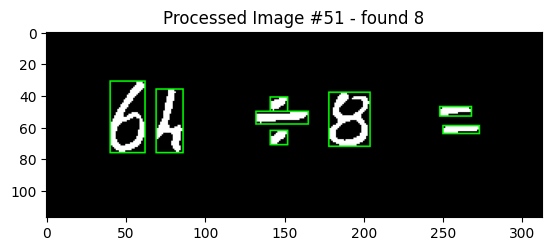

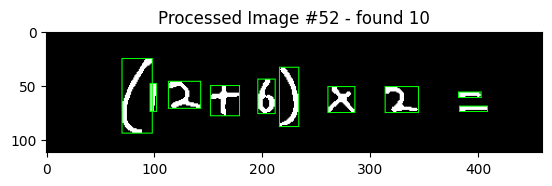

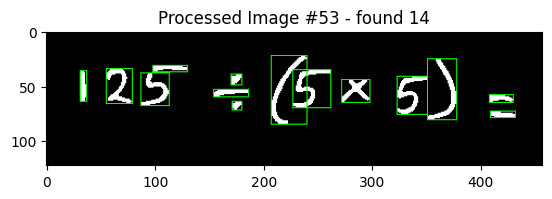

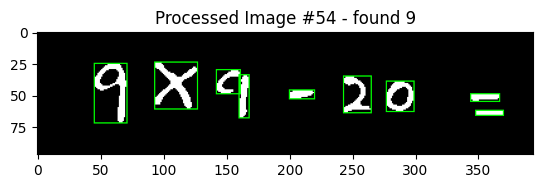

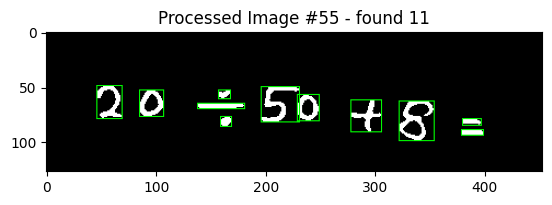

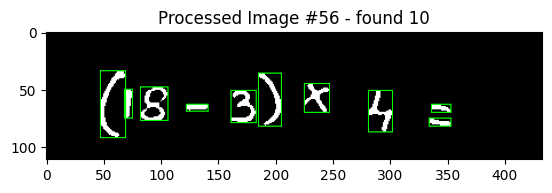

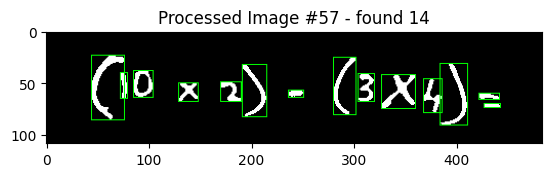

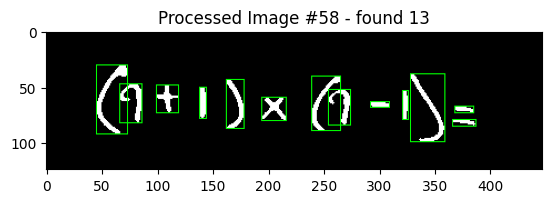

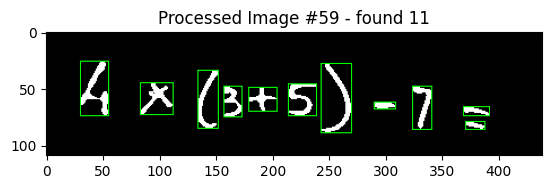

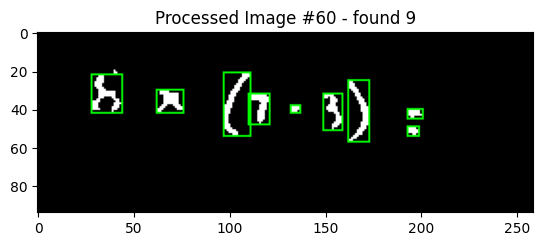

In [16]:
for image_path in file_paths:
    process_image(image_path)